In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
import requests
import io

%matplotlib inline

In [16]:
re = requests.get('https://s3.amazonaws.com/baywheels-data/202001-baywheels-tripdata.csv.zip')
zip_file = zipfile.ZipFile(io.BytesIO(re.content))
csvfile = zip_file.open('202001-baywheels-tripdata.csv')

df = pd.read_csv(csvfile)
df.head()

/var/folders/sp/cb5vkfnj1b95nsbh266gjflh0000gn/T/ipykernel_12234/1591597861.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csvfile)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415442,99.0,Folsom St at 15th St,37.767037,-122.415442,12235,Subscriber,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN


In [17]:
df.to_csv('Ford01-2020.csv', index=False)

In [19]:
df1 = pd.read_csv('Ford01-2020.csv')
df1.tail()

/var/folders/sp/cb5vkfnj1b95nsbh266gjflh0000gn/T/ipykernel_12234/2716015487.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('Ford01-2020.csv')


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
295849,890,2020-01-26 16:18:12,2020-01-26 16:33:02,NaN,NaN,37.810492,-122.476752,NaN,NaN,37.786677,-122.466642,353366,Customer,app
295850,1328,2020-01-06 12:40:12,2020-01-06 13:02:20,NaN,NaN,37.810496,-122.476856,NaN,NaN,37.780677,-122.475797,301867,Subscriber,app
295851,12530,2020-01-09 13:56:54,2020-01-09 17:25:44,NaN,NaN,37.810550,-122.476451,468.0,Grove St at Gough St,37.777870,-122.422953,380070,Subscriber,app
295852,1735,2020-01-30 23:08:59,2020-01-30 23:37:54,NaN,NaN,37.810575,-122.410644,NaN,NaN,37.786252,-122.409532,219934,Subscriber,app
295853,6477,2020-01-04 15:11:49,2020-01-04 16:59:47,NaN,NaN,37.811147,-122.410889,NaN,NaN,37.797196,-122.434999,282535,Customer,app


In [ ]:
def get_csv(month, year = 2020):
    re = request.get(f'https://s3.amazonaws.com/baywheels-data/{year}{month}-baywheels-tripdata.csv.zip)
    zip_file = zipfile.ZipFile(io.BytesIO(re.content))
    csvfile = zip_file.open(f'{year}{month}-baywheels-tripdata.csv')

In [21]:
df2 = pd.read_csv('202002-baywheels-tripdata.csv')
df.head()

/var/folders/sp/cb5vkfnj1b95nsbh266gjflh0000gn/T/ipykernel_12234/1752082633.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('202002-baywheels-tripdata.csv')


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415442,99.0,Folsom St at 15th St,37.767037,-122.415442,12235,Subscriber,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN


In [23]:
df3 = pd.read_csv('202003-baywheels-tripdata.csv')
df3.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN


In [25]:
df1.shape

(295854, 14)

In [26]:
df1.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
280746,710,2020-01-25 15:45:43,2020-01-25 15:57:33,NaN,NaN,37.796938,-122.405360,NaN,NaN,37.786769,-122.412676,484475,Subscriber,app
54882,369,2020-01-15 12:46:43.0260,2020-01-15 12:52:52.3280,58.0,Market St at 10th St,37.776619,-122.417385,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,9581,Customer,NaN
149002,786,2020-01-16 16:46:49,2020-01-16 16:59:55,NaN,NaN,37.760780,-122.387730,NaN,Steuart St at Market St,37.794159,-122.394393,232356,Subscriber,app
201524,809,2020-01-16 08:00:01,2020-01-16 08:13:31,NaN,NaN,37.776253,-122.431216,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,450171,Subscriber,app
43100,649,2020-01-19 15:41:35.6790,2020-01-19 15:52:24.6810,66.0,3rd St at Townsend St,37.778742,-122.392741,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,3110,Customer,NaN
140347,584,2020-01-25 08:10:32,2020-01-25 08:20:17,NaN,NaN,37.755983,-122.406556,NaN,NaN,37.764839,-122.420531,886059,Subscriber,app
46822,292,2020-01-17 19:20:46.1260,2020-01-17 19:25:38.2050,250.0,North Berkeley BART Station,37.873558,-122.283093,351.0,10th St at University Ave,37.869060,-122.293400,12276,Customer,NaN
214239,744,2020-01-21 12:27:30,2020-01-21 12:39:54,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,NaN,NaN,37.793379,-122.397126,336442,Subscriber,app
103713,1093,2020-01-03 11:14:26.3440,2020-01-03 11:32:40.0230,181.0,Grand Ave at Webster St,37.811377,-122.265192,172.0,College Ave at Taft Ave,37.841800,-122.251535,2220,Subscriber,NaN
123331,265,2020-01-11 14:48:36,2020-01-11 14:53:02,NaN,NaN,37.338236,-121.886118,NaN,NaN,37.335672,-121.886490,394133,Customer,app


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295854 entries, 0 to 295853
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             295854 non-null  int64  
 1   start_time               295854 non-null  object 
 2   end_time                 295854 non-null  object 
 3   start_station_id         146286 non-null  float64
 4   start_station_name       146866 non-null  object 
 5   start_station_latitude   295854 non-null  float64
 6   start_station_longitude  295854 non-null  float64
 7   end_station_id           145934 non-null  float64
 8   end_station_name         146511 non-null  object 
 9   end_station_latitude     295854 non-null  float64
 10  end_station_longitude    295854 non-null  float64
 11  bike_id                  295854 non-null  int64  
 12  user_type                295854 non-null  object 
 13  rental_access_method     185746 non-null  object 
dtypes: f

In [29]:
df1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,295854.000000,146286.000000,295854.000000,295854.000000,145934.000000,295854.000000,295854.000000,295854.00000
mean,780.473193,168.900879,37.751277,-122.357866,161.061788,37.751261,-122.356994,321533.84539
std,2037.786317,141.956388,0.228337,0.650796,140.766154,0.238642,0.688512,307015.31534
min,60.000000,3.000000,0.000000,-122.513871,3.000000,0.000000,-122.513846,12.00000
25%,369.000000,53.000000,37.766214,-122.419481,43.000000,37.766376,-122.418306,11328.00000
50%,588.000000,120.000000,37.777158,-122.403234,113.000000,37.777370,-122.402717,279974.00000
75%,912.000000,263.000000,37.790102,-122.392450,250.000000,37.790492,-122.392546,545607.00000
max,811077.000000,506.000000,37.880222,0.000000,506.000000,37.927622,0.000000,999952.00000


In [30]:
df1[df1.duration_sec == 60].count()

duration_sec               54
start_time                 54
end_time                   54
start_station_id           12
start_station_name         12
start_station_latitude     54
start_station_longitude    54
end_station_id             10
end_station_name           11
end_station_latitude       54
end_station_longitude      54
bike_id                    54
user_type                  54
rental_access_method       54
dtype: int64

In [31]:
df1.nlargest(10, ['duration_sec'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
121168,811077,2020-01-09 16:23:21,2020-01-19 01:41:19,NaN,NaN,37.336035,-121.899836,NaN,NaN,37.336549,-121.900961,231296,Subscriber,clipper
49926,86221,2020-01-16 07:51:37.7090,2020-01-17 07:48:39.5150,417.0,Park Ave at Race St,37.326011,-121.912327,417.0,Park Ave at Race St,37.326011,-121.912327,10424,Customer,NaN
63677,85994,2020-01-12 17:08:54.1100,2020-01-13 17:02:08.5300,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,47.0,4th St at Harrison St,37.780955,-122.399749,11107,Customer,NaN
27024,85450,2020-01-23 14:29:54.6580,2020-01-24 14:14:05.0000,14.0,Clay St at Battery St,37.795001,-122.399970,11.0,Davis St at Jackson St,37.797280,-122.398436,13072,Subscriber,NaN
50984,85268,2020-01-15 18:13:47.2190,2020-01-16 17:54:55.2520,258.0,University Ave at Oxford St,37.872355,-122.266447,210.0,45th St at Manila,37.833294,-122.256224,1930,Customer,NaN
219,85011,2020-01-30 21:40:23.0540,2020-01-31 21:17:14.1470,445.0,Natoma St at New Montgomery St,37.786553,-122.399607,74.0,Laguna St at Hayes St,37.776435,-122.426244,2911,Customer,NaN
10193,84254,2020-01-28 17:57:00.2900,2020-01-29 17:21:14.3520,182.0,19th Street BART Station,37.809369,-122.267951,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,3644,Customer,NaN
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
43624,82523,2020-01-18 13:31:23.8140,2020-01-19 12:26:47.3910,196.0,Grand Ave at Perkins St,37.808894,-122.256460,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12548,Customer,NaN
56577,82073,2020-01-14 08:57:41.8670,2020-01-15 07:45:35.1760,250.0,North Berkeley BART Station,37.873558,-122.283093,257.0,Fifth St at Delaware St,37.870407,-122.299676,12695,Customer,NaN


In [33]:
df1.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           149568
start_station_name         148988
start_station_latitude          0
start_station_longitude         0
end_station_id             149920
end_station_name           149343
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       110108
dtype: int64

In [34]:
df1.user_type.value_counts()

Subscriber    170988
Customer      124866
Name: user_type, dtype: int64

In [35]:
df1.rental_access_method.value_counts()

app        171751
clipper     13995
Name: rental_access_method, dtype: int64

In [37]:
df2 = pd.read_csv('202002-baywheels-tripdata.csv', dtype={'rental_access_method': object})
df.shape

(295854, 14)

In [38]:
df2.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
38273,327,2020-01-21 13:37:14.5610,2020-01-21 13:42:41.7660,99.0,Folsom St at 15th St,37.767037,-122.415442,60.0,8th St at Ringold St,37.774520,-122.409449,9782,Customer,NaN
260304,1577,2020-01-08 14:52:56,2020-01-08 15:19:14,NaN,NaN,37.789758,-122.402410,NaN,NaN,37.802452,-122.416732,418816,Customer,app
116996,644,2020-01-03 14:07:36,2020-01-03 14:18:20,276.0,Julian St at The Alameda,37.332233,-121.912516,NaN,NaN,37.335996,-121.890681,439543,Subscriber,app
272643,929,2020-01-23 08:51:01,2020-01-23 09:06:30,NaN,NaN,37.793879,-122.408782,NaN,NaN,37.765345,-122.403525,499655,Subscriber,app
237391,544,2020-01-26 12:34:28,2020-01-26 12:43:32,NaN,NaN,37.784855,-122.432971,NaN,NaN,37.777639,-122.423473,891424,Subscriber,app
187666,414,2020-01-26 18:48:48,2020-01-26 18:55:42,NaN,NaN,37.772949,-122.404550,100.0,Bryant St at 15th St,37.767100,-122.410662,331159,Subscriber,clipper
186638,842,2020-01-28 08:10:03,2020-01-28 08:24:06,NaN,NaN,37.772569,-122.426285,NaN,NaN,37.769153,-122.398498,737583,Subscriber,app
268917,192,2020-01-27 08:08:33,2020-01-27 08:11:46,NaN,NaN,37.792330,-122.401225,NaN,NaN,37.798001,-122.402235,674413,Subscriber,app
58788,346,2020-01-14 17:09:42.1470,2020-01-14 17:15:29.0190,201.0,10th St at Fallon St,37.797673,-122.262997,200.0,2nd Ave at E 18th St,37.800214,-122.253810,10196,Customer,NaN
100774,607,2020-01-04 11:08:29.5030,2020-01-04 11:18:37.2510,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,190.0,West St at 40th St,37.830223,-122.270950,12244,Subscriber,NaN


In [39]:
df2.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,295854.000000,146286.000000,295854.000000,295854.000000,145934.000000,295854.000000,295854.000000,295854.00000
mean,780.473193,168.900879,37.751277,-122.357866,161.061788,37.751261,-122.356994,321533.84539
std,2037.786317,141.956388,0.228337,0.650796,140.766154,0.238642,0.688512,307015.31534
min,60.000000,3.000000,0.000000,-122.513871,3.000000,0.000000,-122.513846,12.00000
25%,369.000000,53.000000,37.766214,-122.419481,43.000000,37.766376,-122.418306,11328.00000
50%,588.000000,120.000000,37.777158,-122.403234,113.000000,37.777370,-122.402717,279974.00000
75%,912.000000,263.000000,37.790102,-122.392450,250.000000,37.790492,-122.392546,545607.00000
max,811077.000000,506.000000,37.880222,0.000000,506.000000,37.927622,0.000000,999952.00000


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295854 entries, 0 to 295853
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             295854 non-null  int64  
 1   start_time               295854 non-null  object 
 2   end_time                 295854 non-null  object 
 3   start_station_id         146286 non-null  float64
 4   start_station_name       146866 non-null  object 
 5   start_station_latitude   295854 non-null  float64
 6   start_station_longitude  295854 non-null  float64
 7   end_station_id           145934 non-null  float64
 8   end_station_name         146511 non-null  object 
 9   end_station_latitude     295854 non-null  float64
 10  end_station_longitude    295854 non-null  float64
 11  bike_id                  295854 non-null  int64  
 12  user_type                295854 non-null  object 
 13  rental_access_method     185746 non-null  object 
dtypes: f

In [41]:
df2[df2.duration_sec== 60].count()

duration_sec               54
start_time                 54
end_time                   54
start_station_id           12
start_station_name         12
start_station_latitude     54
start_station_longitude    54
end_station_id             10
end_station_name           11
end_station_latitude       54
end_station_longitude      54
bike_id                    54
user_type                  54
rental_access_method       54
dtype: int64

In [42]:
df2.nlargest(10, ['duration_sec'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
121168,811077,2020-01-09 16:23:21,2020-01-19 01:41:19,NaN,NaN,37.336035,-121.899836,NaN,NaN,37.336549,-121.900961,231296,Subscriber,clipper
49926,86221,2020-01-16 07:51:37.7090,2020-01-17 07:48:39.5150,417.0,Park Ave at Race St,37.326011,-121.912327,417.0,Park Ave at Race St,37.326011,-121.912327,10424,Customer,NaN
63677,85994,2020-01-12 17:08:54.1100,2020-01-13 17:02:08.5300,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,47.0,4th St at Harrison St,37.780955,-122.399749,11107,Customer,NaN
27024,85450,2020-01-23 14:29:54.6580,2020-01-24 14:14:05.0000,14.0,Clay St at Battery St,37.795001,-122.399970,11.0,Davis St at Jackson St,37.797280,-122.398436,13072,Subscriber,NaN
50984,85268,2020-01-15 18:13:47.2190,2020-01-16 17:54:55.2520,258.0,University Ave at Oxford St,37.872355,-122.266447,210.0,45th St at Manila,37.833294,-122.256224,1930,Customer,NaN
219,85011,2020-01-30 21:40:23.0540,2020-01-31 21:17:14.1470,445.0,Natoma St at New Montgomery St,37.786553,-122.399607,74.0,Laguna St at Hayes St,37.776435,-122.426244,2911,Customer,NaN
10193,84254,2020-01-28 17:57:00.2900,2020-01-29 17:21:14.3520,182.0,19th Street BART Station,37.809369,-122.267951,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,3644,Customer,NaN
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
43624,82523,2020-01-18 13:31:23.8140,2020-01-19 12:26:47.3910,196.0,Grand Ave at Perkins St,37.808894,-122.256460,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12548,Customer,NaN
56577,82073,2020-01-14 08:57:41.8670,2020-01-15 07:45:35.1760,250.0,North Berkeley BART Station,37.873558,-122.283093,257.0,Fifth St at Delaware St,37.870407,-122.299676,12695,Customer,NaN


In [43]:
df2.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           149568
start_station_name         148988
start_station_latitude          0
start_station_longitude         0
end_station_id             149920
end_station_name           149343
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       110108
dtype: int64

In [44]:
df2.user_type.value_counts()

Subscriber    170988
Customer      124866
Name: user_type, dtype: int64

In [45]:
df2.rental_access_method.value_counts()

app        171751
clipper     13995
Name: rental_access_method, dtype: int64

In [47]:
df3 = pd.read_csv('202003-baywheels-tripdata.csv', dtype={'rental_access_method': object})
df3.shape

(176799, 14)

In [48]:
df3.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
86075,569,2020-03-04 06:51:23,2020-03-04 07:00:53,NaN,NaN,37.752169,-122.419134,130.0,22nd St Caltrain Station,37.757704,-122.391885,707170,Subscriber,app
26320,612,2020-03-09 19:13:35.5350,2020-03-09 19:23:47.6320,58.0,Market St at 10th St,37.776619,-122.417385,36.0,Folsom St at 3rd St,37.783830,-122.398870,10440,Customer,NaN
112028,749,2020-03-03 17:18:42,2020-03-03 17:31:12,NaN,NaN,37.770998,-122.394464,NaN,NaN,37.785106,-122.406871,121622,Subscriber,app
83818,440,2020-03-05 08:47:37,2020-03-05 08:54:57,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,NaN,NaN,37.764716,-122.419639,212114,Subscriber,app
36847,506,2020-03-06 09:00:56.7900,2020-03-06 09:09:23.4470,190.0,West St at 40th St,37.830223,-122.270950,148.0,Horton St at 40th St,37.829705,-122.287610,3287,Customer,NaN
150687,2618,2020-03-21 11:00:01,2020-03-21 11:43:40,369.0,Hyde St at Post St,37.787349,-122.416651,369.0,Hyde St at Post St,37.787349,-122.416651,867708,Subscriber,app
45100,657,2020-03-04 16:33:10.5430,2020-03-04 16:44:08.4960,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,12010,Customer,NaN
160123,740,2020-03-10 17:04:11,2020-03-10 17:16:31,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,NaN,NaN,37.805496,-122.413658,480062,Subscriber,app
77299,194,2020-03-12 08:50:40,2020-03-12 08:53:54,357.0,2nd St at Julian St,37.341132,-121.892844,309.0,San Jose City Hall,37.337391,-121.886995,791001,Subscriber,app
56215,1308,2020-03-02 17:49:58.1830,2020-03-02 18:11:46.4320,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,134.0,Valencia St at 24th St,37.752428,-122.420628,9869,Customer,NaN


In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             176799 non-null  int64  
 1   start_time               176799 non-null  object 
 2   end_time                 176799 non-null  object 
 3   start_station_id         110696 non-null  float64
 4   start_station_name       111349 non-null  object 
 5   start_station_latitude   176799 non-null  float64
 6   start_station_longitude  176799 non-null  float64
 7   end_station_id           111097 non-null  float64
 8   end_station_name         111794 non-null  object 
 9   end_station_latitude     176799 non-null  float64
 10  end_station_longitude    176799 non-null  float64
 11  bike_id                  176799 non-null  int64  
 12  user_type                176799 non-null  object 
 13  rental_access_method     114269 non-null  object 
dtypes: f

In [50]:
df3.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,176799.000000,110696.000000,176799.000000,176799.000000,111097.000000,176799.000000,176799.000000,176799.000000
mean,861.590156,185.082261,37.732506,-122.339595,179.244228,37.731290,-122.335029,332033.876114
std,1528.143090,154.647521,0.170476,0.336403,153.858017,0.278159,0.788013,310588.686471
min,60.000000,3.000000,0.000000,-122.513814,3.000000,0.000000,-122.529747,17.000000
25%,374.000000,58.000000,37.763708,-122.421339,53.000000,37.763848,-122.420377,11695.000000
50%,602.000000,125.000000,37.776598,-122.403969,121.000000,37.776598,-122.403234,299042.000000
75%,963.000000,321.000000,37.789677,-122.390648,309.000000,37.789747,-122.390648,551560.000000
max,84450.000000,521.000000,37.880222,0.000000,521.000000,37.995942,0.000000,999960.000000


In [51]:
df3.nlargest(10,['duration_sec'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
7463,84450,2020-03-20 10:07:18.0910,2020-03-21 09:34:48.1470,84.0,Duboce Park,37.769200,-122.433812,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,2947,Customer,NaN
11311,82608,2020-03-15 13:14:31.1470,2020-03-16 12:11:19.8850,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,74.0,Laguna St at Hayes St,37.776435,-122.426244,2589,Customer,NaN
43844,82449,2020-03-03 19:53:05.7190,2020-03-04 18:47:15.4680,508.0,St. Joseph's Ave at Geary Blvd,37.782476,-122.442534,455.0,McAllister St at Arguello Blvd,37.775214,-122.458334,11396,Customer,NaN
4392,81351,2020-03-24 11:45:56.7950,2020-03-25 10:21:47.8420,178.0,Broadway at 30th St,37.819381,-122.261928,178.0,Broadway at 30th St,37.819381,-122.261928,12660,Subscriber,NaN
23142,80980,2020-03-09 19:19:48.0250,2020-03-10 17:49:28.1160,246.0,Berkeley Civic Center,37.869060,-122.270556,167.0,College Ave at Harwood Ave,37.848152,-122.252160,154,Customer,NaN
18831,78832,2020-03-10 21:57:46.2410,2020-03-11 19:51:39.1080,105.0,16th St at Prosper St,37.764285,-122.431804,411.0,Octavia Blvd at Page St,37.774018,-122.423809,13061,Customer,NaN
40027,78807,2020-03-04 18:03:38.4400,2020-03-05 15:57:05.8060,81.0,Berry St at 4th St,37.775880,-122.393170,24.0,Spear St at Folsom St,37.789677,-122.390428,9770,Customer,NaN
703,77675,2020-03-30 01:57:23.5140,2020-03-30 23:31:58.6850,369.0,Hyde St at Post St,37.787349,-122.416651,419.0,Fern St at Polk St,37.788197,-122.420373,10098,Customer,NaN
704,77592,2020-03-30 01:57:08.6270,2020-03-30 23:30:21.6170,369.0,Hyde St at Post St,37.787349,-122.416651,419.0,Fern St at Polk St,37.788197,-122.420373,11920,Customer,NaN
60474,77132,2020-03-01 02:48:35.5210,2020-03-02 00:14:08.1810,86.0,Market St at Dolores St,37.769305,-122.426826,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,11311,Customer,NaN


In [53]:
df3[df3.duration_sec == 84450]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
7463,84450,2020-03-20 10:07:18.0910,2020-03-21 09:34:48.1470,84.0,Duboce Park,37.7692,-122.433812,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,2947,Customer,NaN


In [54]:
df3.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           66103
start_station_name         65450
start_station_latitude         0
start_station_longitude        0
end_station_id             65702
end_station_name           65005
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
rental_access_method       62530
dtype: int64

In [55]:
df3.user_type.value_counts()

Subscriber    96262
Customer      80537
Name: user_type, dtype: int64

In [57]:
df3.rental_access_method.value_counts()

app        105515
clipper      8754
Name: rental_access_method, dtype: int64

In [59]:
clean_df1 = df1.copy()
clean_df2 = df2.copy()
clean_df3 = df3.copy()

In [60]:
clean_df1['month'] = 'January'
clean_df2['month'] = 'February'
clean_df3['month'] = 'March'

In [72]:
clean_df1.to_csv('Clean_jan.csv', index=False)
clean_df1.to_csv('Ford_2020.csv', index=False)
clean_df2.to_csv('Clean_feb.csv', index=False)
clean_df3.to_csv('Clean_march.csv', index=False)

In [73]:
clean_df1 = pd.read_csv('Clean_jan.csv', dtype={'rental_access_method': object})
clean_df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,month
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN,January
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415442,99.0,Folsom St at 15th St,37.767037,-122.415442,12235,Subscriber,NaN,January
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN,January
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN,January
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN,January


In [74]:
clean_df1.shape

(295854, 15)

In [75]:
clean_df2 = pd.read_csv('Clean_feb.csv', dtype={'rental_access_method': object})
clean_df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,month
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN,February
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415442,99.0,Folsom St at 15th St,37.767037,-122.415442,12235,Subscriber,NaN,February
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN,February
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN,February
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN,February


In [76]:
clean_df2.shape

(295854, 15)

In [77]:
clean_df3 = pd.read_csv('Clean_march.csv', dtype={'rental_access_method': object})
clean_df3.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,month
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN,March
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN,March
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN,March
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN,March
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN,March


In [78]:
clean_df3.shape

(176799, 15)

In [79]:
files = ['Clean_feb.csv', 'Clean_march.csv']

df_2020 = pd.read_csv('Ford_2020.csv')
for file in files:
    df_2020 = df_2020.append(pd.read_csv(file))

/var/folders/sp/cb5vkfnj1b95nsbh266gjflh0000gn/T/ipykernel_12234/2355541869.py:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020 = pd.read_csv('Ford_2020.csv')
/var/folders/sp/cb5vkfnj1b95nsbh266gjflh0000gn/T/ipykernel_12234/2355541869.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020 = df_2020.append(pd.read_csv(file))
/var/folders/sp/cb5vkfnj1b95nsbh266gjflh0000gn/T/ipykernel_12234/2355541869.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2020 = df_2020.append(pd.read_csv(file))
/var/folders/sp/cb5vkfnj1b95nsbh266gjflh0000gn/T/ipykernel_12234/2355541869.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2020 = df_2020.append(pd.read_csv(file))


In [80]:
df_2020.shape

(768507, 15)

In [97]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768507 entries, 0 to 176798
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   duration_sec            768507 non-null  int64         
 1   duration_minutes        768507 non-null  float64       
 2   duration_hours          768507 non-null  float64       
 3   duration_days           768507 non-null  float64       
 4   start_day               768507 non-null  object        
 5   start_time              768507 non-null  datetime64[ns]
 6   end_day                 768507 non-null  object        
 7   end_time                768507 non-null  datetime64[ns]
 8   start_station_name      405081 non-null  object        
 9   start_station_latitude  768507 non-null  float64       
 10  end_station_id          768507 non-null  object        
 11  end_station_name        404816 non-null  object        
 12  bike_id                 768507

In [82]:
clean_df3.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,month
176794,61,2020-04-01 10:42:35,2020-04-01 10:43:37,NaN,NaN,37.848493,-122.265797,NaN,NaN,37.848476,-122.265779,999960,Subscriber,app,March
176795,78,2020-03-18 17:10:42,2020-03-18 17:12:01,NaN,NaN,37.848499,-122.265794,NaN,NaN,37.848476,-122.265815,999960,Subscriber,app,March
176796,122,2020-04-01 13:32:28,2020-04-01 13:34:31,NaN,NaN,37.848507,-122.266010,NaN,NaN,37.848486,-122.266063,633095,Subscriber,app,March
176797,340,2020-04-01 13:07:34,2020-04-01 13:13:14,NaN,NaN,37.848530,-122.266013,NaN,NaN,37.848497,-122.266029,633095,Subscriber,app,March
176798,333,2020-03-23 16:39:57,2020-03-23 16:45:30,NaN,NaN,37.848625,-122.266660,NaN,NaN,37.848446,-122.266021,633095,Subscriber,app,March


In [98]:
df_2020.drop([ 'start_station_latitude'], axis=1, inplace=True)

In [99]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768507 entries, 0 to 176798
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   duration_sec          768507 non-null  int64         
 1   duration_minutes      768507 non-null  float64       
 2   duration_hours        768507 non-null  float64       
 3   duration_days         768507 non-null  float64       
 4   start_day             768507 non-null  object        
 5   start_time            768507 non-null  datetime64[ns]
 6   end_day               768507 non-null  object        
 7   end_time              768507 non-null  datetime64[ns]
 8   start_station_name    405081 non-null  object        
 9   end_station_id        768507 non-null  object        
 10  end_station_name      404816 non-null  object        
 11  bike_id               768507 non-null  object        
 12  user_type             768507 non-null  object        
 13 

In [102]:
df_2020.head()

,duration_sec,duration_minutes,duration_hours,duration_days,start_day,start_time,end_day,end_time,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,month,start_station_id
0,83118,1385.300000,23.088333,0.962014,Friday,2020-01-31 15:23:47.733,Saturday,2020-02-01 14:29:06.263,Buchanan St at North Point St,400.0,Buchanan St at North Point St,13052,Customer,NaN,January,Buchanan St at North Point St
1,68239,1137.316667,18.955278,0.789803,Friday,2020-01-31 15:40:31.616,Saturday,2020-02-01 10:37:51.000,Folsom St at 15th St,99.0,Folsom St at 15th St,12235,Subscriber,NaN,January,Folsom St at 15th St
2,55407,923.450000,15.390833,0.641285,Friday,2020-01-31 17:48:16.635,Saturday,2020-02-01 09:11:44.317,El Embarcadero at Grand Ave,197.0,El Embarcadero at Grand Ave,12822,Customer,NaN,January,El Embarcadero at Grand Ave
3,54929,915.483333,15.258056,0.635752,Friday,2020-01-31 17:53:03.413,Saturday,2020-02-01 09:08:32.634,El Embarcadero at Grand Ave,197.0,El Embarcadero at Grand Ave,11705,Customer,NaN,January,El Embarcadero at Grand Ave
4,55700,928.333333,15.472222,0.644676,Friday,2020-01-31 17:12:33.460,Saturday,2020-02-01 08:40:53.646,Pier 1/2 at The Embarcadero,371.0,Lombard St at Columbus Ave,3673,Customer,NaN,January,Pier 1/2 at The Embarcadero


In [107]:
df_2020[['start_time', 'end_time']] = df_2020[['start_time', 'end_time']].apply(pd.to_datetime)

In [108]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768507 entries, 0 to 176798
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   duration_sec          768507 non-null  int64         
 1   duration_minutes      768507 non-null  float64       
 2   duration_hours        768507 non-null  float64       
 3   duration_days         768507 non-null  float64       
 4   start_day             768507 non-null  object        
 5   start_time            768507 non-null  datetime64[ns]
 6   end_day               768507 non-null  object        
 7   end_time              768507 non-null  datetime64[ns]
 8   start_station_name    405081 non-null  object        
 9   end_station_id        768507 non-null  object        
 10  end_station_name      404816 non-null  object        
 11  bike_id               768507 non-null  object        
 12  user_type             768507 non-null  object        
 13 

In [109]:
df_2020[['start_station_id', 'end_station_id', 'bike_id']] = df_2020[['start_station_name', 'end_station_id', 'bike_id']].astype(str)

In [110]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768507 entries, 0 to 176798
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   duration_sec          768507 non-null  int64         
 1   duration_minutes      768507 non-null  float64       
 2   duration_hours        768507 non-null  float64       
 3   duration_days         768507 non-null  float64       
 4   start_day             768507 non-null  object        
 5   start_time            768507 non-null  datetime64[ns]
 6   end_day               768507 non-null  object        
 7   end_time              768507 non-null  datetime64[ns]
 8   start_station_name    405081 non-null  object        
 9   end_station_id        768507 non-null  object        
 10  end_station_name      404816 non-null  object        
 11  bike_id               768507 non-null  object        
 12  user_type             768507 non-null  object        
 13 

In [111]:
df_2020.nlargest(10,['duration_sec'])

,duration_sec,duration_minutes,duration_hours,duration_days,start_day,start_time,end_day,end_time,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,month,start_station_id
121168,811077,13517.950000,225.299167,9.387465,Thursday,2020-01-09 16:23:21.000,Sunday,2020-01-19 01:41:19.000,NaN,nan,NaN,231296,Subscriber,clipper,January,nan
121168,811077,13517.950000,225.299167,9.387465,Thursday,2020-01-09 16:23:21.000,Sunday,2020-01-19 01:41:19.000,NaN,nan,NaN,231296,Subscriber,clipper,February,nan
49926,86221,1437.016667,23.950278,0.997928,Thursday,2020-01-16 07:51:37.709,Friday,2020-01-17 07:48:39.515,Park Ave at Race St,417.0,Park Ave at Race St,10424,Customer,NaN,January,Park Ave at Race St
49926,86221,1437.016667,23.950278,0.997928,Thursday,2020-01-16 07:51:37.709,Friday,2020-01-17 07:48:39.515,Park Ave at Race St,417.0,Park Ave at Race St,10424,Customer,NaN,February,Park Ave at Race St
63677,85994,1433.233333,23.887222,0.995301,Sunday,2020-01-12 17:08:54.110,Monday,2020-01-13 17:02:08.530,Yerba Buena Center for the Arts (Howard St at ...,47.0,4th St at Harrison St,11107,Customer,NaN,January,Yerba Buena Center for the Arts (Howard St at ...
63677,85994,1433.233333,23.887222,0.995301,Sunday,2020-01-12 17:08:54.110,Monday,2020-01-13 17:02:08.530,Yerba Buena Center for the Arts (Howard St at ...,47.0,4th St at Harrison St,11107,Customer,NaN,February,Yerba Buena Center for the Arts (Howard St at ...
27024,85450,1424.166667,23.736111,0.989005,Thursday,2020-01-23 14:29:54.658,Friday,2020-01-24 14:14:05.000,Clay St at Battery St,11.0,Davis St at Jackson St,13072,Subscriber,NaN,January,Clay St at Battery St
27024,85450,1424.166667,23.736111,0.989005,Thursday,2020-01-23 14:29:54.658,Friday,2020-01-24 14:14:05.000,Clay St at Battery St,11.0,Davis St at Jackson St,13072,Subscriber,NaN,February,Clay St at Battery St
50984,85268,1421.133333,23.685556,0.986898,Wednesday,2020-01-15 18:13:47.219,Thursday,2020-01-16 17:54:55.252,University Ave at Oxford St,210.0,45th St at Manila,1930,Customer,NaN,January,University Ave at Oxford St
50984,85268,1421.133333,23.685556,0.986898,Wednesday,2020-01-15 18:13:47.219,Thursday,2020-01-16 17:54:55.252,University Ave at Oxford St,210.0,45th St at Manila,1930,Customer,NaN,February,University Ave at Oxford St


In [112]:
df_2020 = df_2020.drop([df_2020.index[121168]])

In [113]:
df_2020.nlargest(10,['duration_sec'])

,duration_sec,duration_minutes,duration_hours,duration_days,start_day,start_time,end_day,end_time,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,month,start_station_id
49926,86221,1437.016667,23.950278,0.997928,Thursday,2020-01-16 07:51:37.709,Friday,2020-01-17 07:48:39.515,Park Ave at Race St,417.0,Park Ave at Race St,10424,Customer,NaN,January,Park Ave at Race St
49926,86221,1437.016667,23.950278,0.997928,Thursday,2020-01-16 07:51:37.709,Friday,2020-01-17 07:48:39.515,Park Ave at Race St,417.0,Park Ave at Race St,10424,Customer,NaN,February,Park Ave at Race St
63677,85994,1433.233333,23.887222,0.995301,Sunday,2020-01-12 17:08:54.110,Monday,2020-01-13 17:02:08.530,Yerba Buena Center for the Arts (Howard St at ...,47.0,4th St at Harrison St,11107,Customer,NaN,January,Yerba Buena Center for the Arts (Howard St at ...
63677,85994,1433.233333,23.887222,0.995301,Sunday,2020-01-12 17:08:54.110,Monday,2020-01-13 17:02:08.530,Yerba Buena Center for the Arts (Howard St at ...,47.0,4th St at Harrison St,11107,Customer,NaN,February,Yerba Buena Center for the Arts (Howard St at ...
27024,85450,1424.166667,23.736111,0.989005,Thursday,2020-01-23 14:29:54.658,Friday,2020-01-24 14:14:05.000,Clay St at Battery St,11.0,Davis St at Jackson St,13072,Subscriber,NaN,January,Clay St at Battery St
27024,85450,1424.166667,23.736111,0.989005,Thursday,2020-01-23 14:29:54.658,Friday,2020-01-24 14:14:05.000,Clay St at Battery St,11.0,Davis St at Jackson St,13072,Subscriber,NaN,February,Clay St at Battery St
50984,85268,1421.133333,23.685556,0.986898,Wednesday,2020-01-15 18:13:47.219,Thursday,2020-01-16 17:54:55.252,University Ave at Oxford St,210.0,45th St at Manila,1930,Customer,NaN,January,University Ave at Oxford St
50984,85268,1421.133333,23.685556,0.986898,Wednesday,2020-01-15 18:13:47.219,Thursday,2020-01-16 17:54:55.252,University Ave at Oxford St,210.0,45th St at Manila,1930,Customer,NaN,February,University Ave at Oxford St
219,85011,1416.850000,23.614167,0.983924,Thursday,2020-01-30 21:40:23.054,Friday,2020-01-31 21:17:14.147,Natoma St at New Montgomery St,74.0,Laguna St at Hayes St,2911,Customer,NaN,January,Natoma St at New Montgomery St
219,85011,1416.850000,23.614167,0.983924,Thursday,2020-01-30 21:40:23.054,Friday,2020-01-31 21:17:14.147,Natoma St at New Montgomery St,74.0,Laguna St at Hayes St,2911,Customer,NaN,February,Natoma St at New Montgomery St


In [114]:
df_2020.to_csv('Clean_Ford_2020.csv', index=False)
df_2020.head()

,duration_sec,duration_minutes,duration_hours,duration_days,start_day,start_time,end_day,end_time,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,month,start_station_id
0,83118,1385.300000,23.088333,0.962014,Friday,2020-01-31 15:23:47.733,Saturday,2020-02-01 14:29:06.263,Buchanan St at North Point St,400.0,Buchanan St at North Point St,13052,Customer,NaN,January,Buchanan St at North Point St
1,68239,1137.316667,18.955278,0.789803,Friday,2020-01-31 15:40:31.616,Saturday,2020-02-01 10:37:51.000,Folsom St at 15th St,99.0,Folsom St at 15th St,12235,Subscriber,NaN,January,Folsom St at 15th St
2,55407,923.450000,15.390833,0.641285,Friday,2020-01-31 17:48:16.635,Saturday,2020-02-01 09:11:44.317,El Embarcadero at Grand Ave,197.0,El Embarcadero at Grand Ave,12822,Customer,NaN,January,El Embarcadero at Grand Ave
3,54929,915.483333,15.258056,0.635752,Friday,2020-01-31 17:53:03.413,Saturday,2020-02-01 09:08:32.634,El Embarcadero at Grand Ave,197.0,El Embarcadero at Grand Ave,11705,Customer,NaN,January,El Embarcadero at Grand Ave
4,55700,928.333333,15.472222,0.644676,Friday,2020-01-31 17:12:33.460,Saturday,2020-02-01 08:40:53.646,Pier 1/2 at The Embarcadero,371.0,Lombard St at Columbus Ave,3673,Customer,NaN,January,Pier 1/2 at The Embarcadero


In [115]:
df_2020.describe()

,duration_sec,duration_minutes,duration_hours,duration_days
count,768504.000000,768504.000000,768504.000000,768504.000000
mean,797.026445,13.283774,0.221396,0.009225
std,1423.727922,23.728799,0.395480,0.016478
min,60.000000,1.000000,0.016667,0.000694
25%,370.000000,6.166667,0.102778,0.004282
50%,591.000000,9.850000,0.164167,0.006840
75%,922.000000,15.366667,0.256111,0.010671
max,86221.000000,1437.016667,23.950278,0.997928


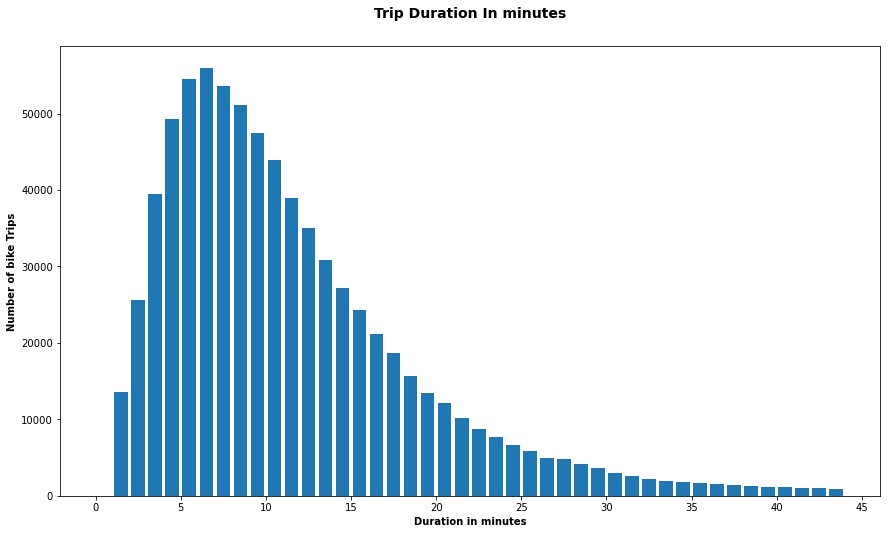

In [119]:
plt.figure(figsize=[14.70,8.27])
bin_edges = np.arange(0,45,1)
ticks =[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_2020, x = 'duration_minutes', bins = bin_edges, rwidth = 0.8);
plt.title('Trip Duration In minutes', y = 1.05, fontsize=14, fontweight='bold')
plt.xlabel('Duration in minutes', fontweight= 'bold')
plt.xticks(ticks, labels)
plt.ylabel('Number of bike Trips', fontweight='bold');

In [120]:
df_2020.month.value_counts()

January     295853
February    295853
March       176798
Name: month, dtype: int64

In [121]:
df_2020.month.describe()

count      768504
unique          3
top       January
freq       295853
Name: month, dtype: object

Text(0, 0.5, 'Number of bikes trips')

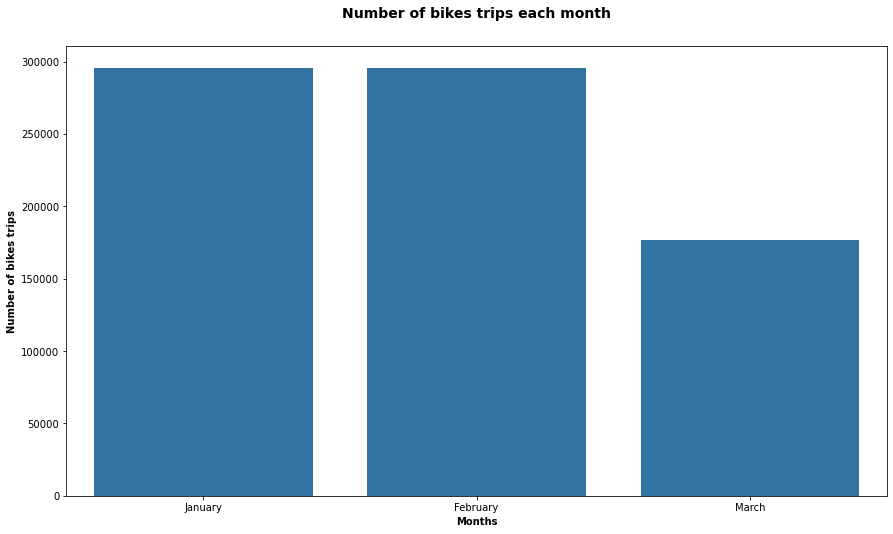

In [123]:
plt.figure(figsize=[14.70,8.27])
base_color = sb.color_palette()[0]
month_order = df_2020['month'].value_counts().index
sb.countplot(data = df_2020, x = 'month', color = base_color, order = month_order)
plt.title('Number of bikes trips each month', y =1.05, fontsize=14, fontweight='bold')
plt.xlabel('Months', fontweight ='bold')
plt.ylabel('Number of bikes trips', fontweight = 'bold')

In [124]:
df_2020.start_day.value_counts()

Friday       134929
Wednesday    134835
Thursday     127928
Tuesday      114255
Monday       111667
Sunday        74521
Saturday      70369
Name: start_day, dtype: int64

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

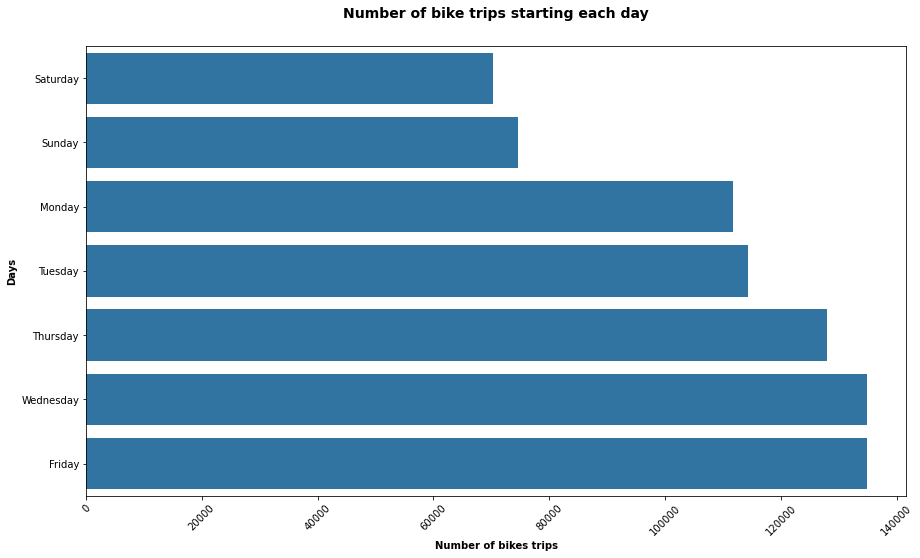

In [127]:
plt.figure(figsize= [14.70, 8.27])
base_color = sb.color_palette()[0]
startDay_order = df_2020['start_day'].value_counts(ascending=True).index
sb.countplot(data = df_2020, y = 'start_day', color = base_color, order= startDay_order)
plt.title('Number of bike trips starting each day', y = 1.05 , fontsize=14, fontweight='bold')
plt.ylabel('Days', fontweight= 'bold')
plt.xlabel('Number of bikes trips', fontweight= 'bold')
plt.xticks(rotation = 45)

In [128]:
df_2020.end_day.value_counts()

Wednesday    134836
Friday       134781
Thursday     127919
Tuesday      114220
Monday       111649
Sunday        74677
Saturday      70422
Name: end_day, dtype: int64

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

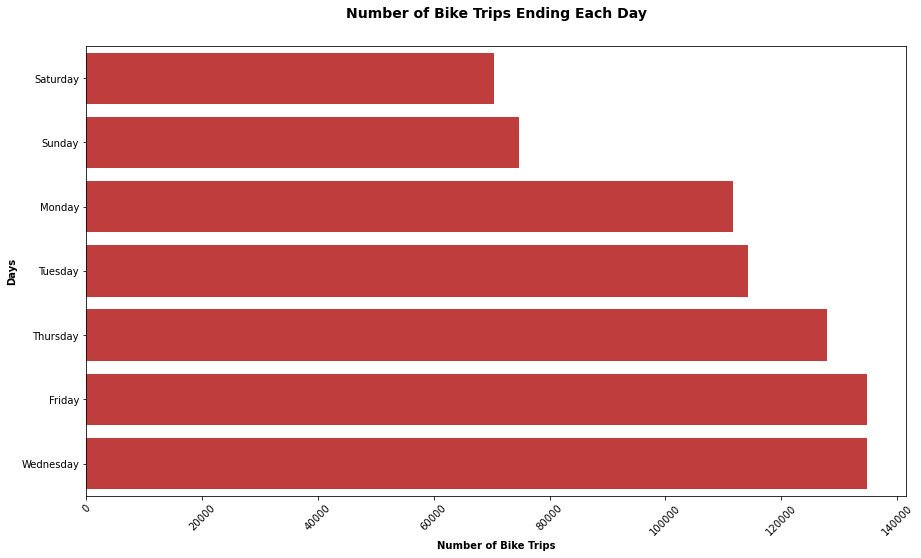

In [130]:
plt.figure(figsize=[14.70,8.27])
base_color = sb.color_palette()[3]
startDay_order = df_2020['end_day'].value_counts(ascending=True).index
sb.countplot(data = df_2020, y = 'end_day', color = base_color, order = startDay_order)
plt.title('Number of Bike Trips Ending Each Day', y = 1.05, fontsize = 14, fontweight= 'bold')
plt.ylabel('Days', fontweight= 'bold')
plt.xlabel('Number of Bike Trips', fontweight = 'bold')
plt.xticks(rotation= 45)

Text(0, 0.5, 'Duration of bike Trips')

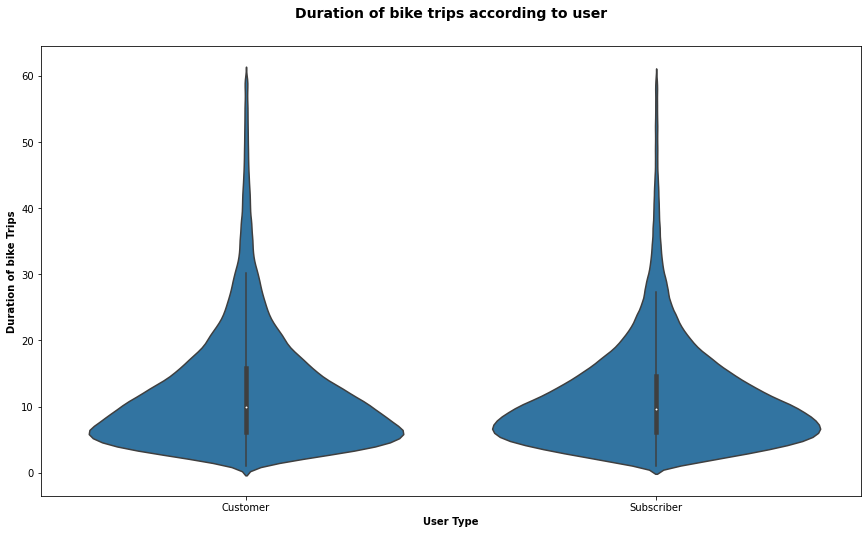

In [134]:
plt.figure(figsize=[14.70, 8.27])
sb.violinplot(data = df_2020.query('duration_minutes <= 60'), x = 'user_type', y='duration_minutes', color= sb.color_palette()[0])
plt.title('Duration of bike trips according to user', y=1.05, fontsize = 14, fontweight= 'bold')
plt.xlabel('User Type', fontweight = 'bold')
plt.ylabel('Duration of bike Trips', fontweight='bold')

Text(0, 0.5, 'Average Duration of bike trips in minutes')

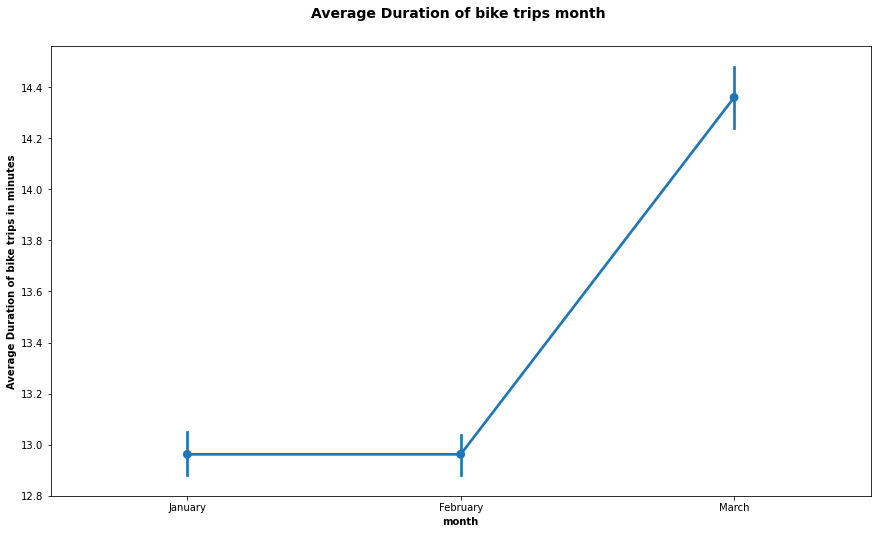

In [141]:
plt.figure(figsize=[14.70, 8.27])
base_color = sb.color_palette()[0]
sb.pointplot(data = df_2020, x = 'month', y='duration_minutes', color= base_color)
plt.title('Average Duration of bike trips month ', y=1.05, fontsize = 14, fontweight= 'bold')
plt.xlabel('month', fontweight = 'bold')
plt.ylabel('Average Duration of bike trips in minutes', fontweight='bold')

Text(0, 0.5, 'Trip duration in minutes ')

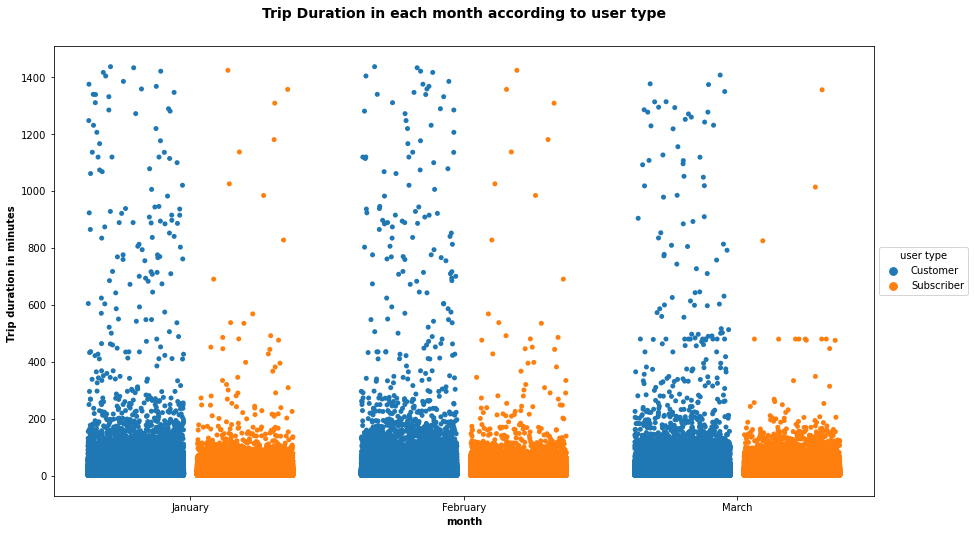

In [144]:
plt.figure(figsize=[14.70, 8.27])
sb.stripplot(data = df_2020, x = 'month', y = 'duration_minutes', hue = 'user_type',jitter = 0.35, dodge = True)
plt.legend(loc= 'center left', bbox_to_anchor = (1, 0.5), title = 'user type')
plt.title('Trip Duration in each month according to user type', y=1.05, fontsize= 14 , fontweight= 'bold')
plt.xlabel('month',fontweight = 'bold')
plt.ylabel('Trip duration in minutes ', fontweight = 'bold')